<a href="https://colab.research.google.com/github/schardon/oda-demo-main/blob/main/Day4-%20Tracking_Malware_Drift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
month0 = {"Trojan": 24, "CryptoMiner": 11, "Other": 36, "Worm": 29}
month1 = {"Trojan": 28, "CryptoMiner": 25, "Other": 22, "Worm": 25}
month2 = {"Trojan": 18, "CryptoMiner": 36, "Other": 41, "Worm": 5}
month3 = {"CryptoMiner": 18, "Trojan": 33, "Other": 44, "Worm": 5}
months = [month0, month1, month2, month3]

In [2]:
trojan_time_series = []
crypto_miner_time_series = []
worm_time_series = []
other_time_series = []
for month in months:
    trojan_time_series.append(month["Trojan"])
    crypto_miner_time_series.append(month["CryptoMiner"])
    worm_time_series.append(month["Worm"])
    other_time_series.append(month["Other"])

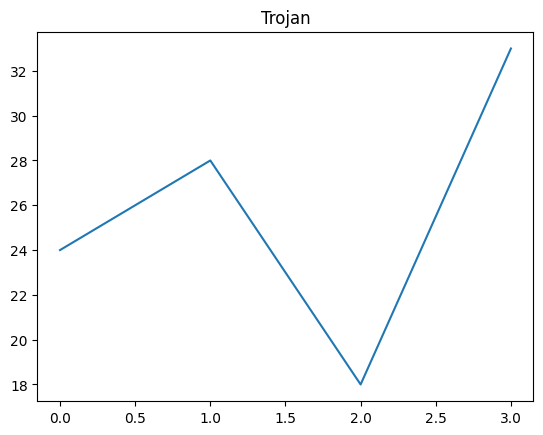

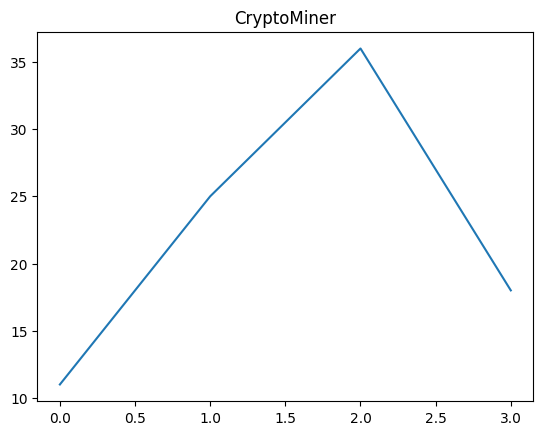

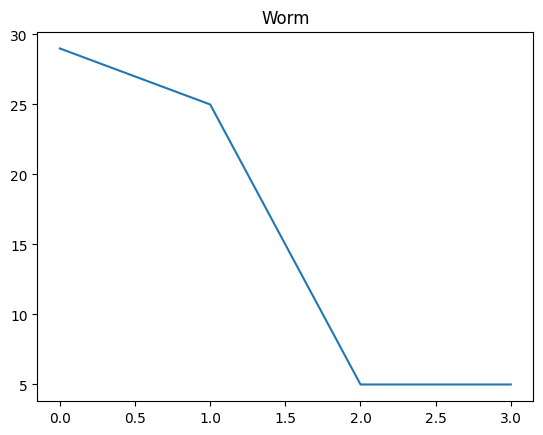

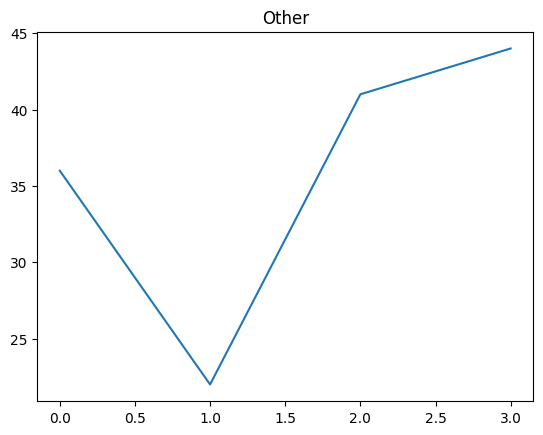

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Trojan")
plt.plot(trojan_time_series)
plt.savefig("TrojanGraph")
plt.show()
plt.title("CryptoMiner")
plt.plot(crypto_miner_time_series)
plt.savefig("CryptoMinerGraph")
plt.show()
plt.title("Worm")
plt.plot(worm_time_series)
plt.savefig("WormGraph")
plt.show()
plt.title("Other")
plt.plot(other_time_series)
plt.savefig("OtherGraph")
plt.show()

In [4]:
from statsmodels.tsa.arima.model import ARIMA

In [5]:
ts_model = ARIMA(trojan_time_series, order=(0, 1, 2))
model_fit_to_data = ts_model.fit()
y_Trojan = model_fit_to_data.predict(len(trojan_time_series), len(trojan_time_series))
print("Trojan prediction for following month: " + str(y_Trojan[0]) + "%")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Trojan prediction for following month: 21.75384113650052%


In [6]:
ts_model = ARIMA(crypto_miner_time_series, order=(0, 1, 2))
model_fit_to_data = ts_model.fit()
y_CryptoMiner = model_fit_to_data.predict(
    len(crypto_miner_time_series), len(crypto_miner_time_series)
)
print("CryptoMiner prediction for following month: " + str(y_CryptoMiner[0]) + "%")

CryptoMiner prediction for following month: 12.499484369467265%


In [7]:
ts_model = ARIMA(worm_time_series, order=(0, 1, 2))
model_fit_to_data = ts_model.fit()
y_Worm = model_fit_to_data.predict(len(worm_time_series), len(worm_time_series))
print("Worm prediction for following month: " + str(y_Worm[0]) + "%")

Worm prediction for following month: 13.524690184548135%


In [8]:
ts_model = ARIMA(other_time_series, order=(0, 1, 2))
model_fit_to_data = ts_model.fit()
y_Other = model_fit_to_data.predict(len(other_time_series), len(other_time_series))
print("Other prediction for following month: " + str(y_Other[0]) + "%")

Other prediction for following month: 37.72514553921948%
